<a href="https://colab.research.google.com/github/wawosz/Colaboratory/blob/main/ODE_Integrator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

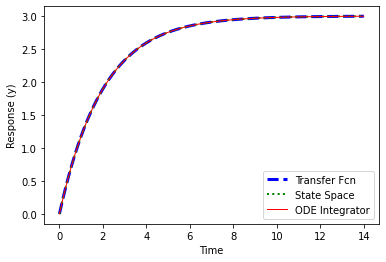

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()